In [17]:
# Import các thư viện cần thiết
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import defaultdict
import glob
from pathlib import Path

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Đường dẫn đến dữ liệu
DATA_PATH = "../data/raw"
CLASSES = ['cats', 'dogs', 'chickens', 'tigers']

print("✅ Import thành công!")
print(f"📂 Đường dẫn dữ liệu: {DATA_PATH}")
print(f"🏷️ Các lớp: {CLASSES}")


✅ Import thành công!
📂 Đường dẫn dữ liệu: ../data/raw
🏷️ Các lớp: ['cats', 'dogs', 'chickens', 'tigers']


In [18]:
# Hàm để thu thập thông tin về các file ảnh
def collect_image_info(data_path, classes):
    """Thu thập thông tin chi tiết về các file ảnh"""
    image_info = []
    
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        if os.path.exists(class_path):
            # Lấy tất cả file ảnh (jpg, png, jpeg)
            image_files = glob.glob(os.path.join(class_path, "*.[jpJP][pnPeNgG]*"))
            
            for img_path in image_files:
                try:
                    # Lấy thông tin file
                    file_size = os.path.getsize(img_path) / 1024  # KB
                    file_ext = os.path.splitext(img_path)[1].lower()
                    
                    # Lấy thông tin ảnh
                    with Image.open(img_path) as img:
                        width, height = img.size
                        mode = img.mode
                        format_name = img.format
                    
                    image_info.append({
                        'class': class_name,
                        'filename': os.path.basename(img_path),
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'aspect_ratio': width / height,
                        'total_pixels': width * height,
                        'file_size_kb': round(file_size, 2),
                        'format': format_name,
                        'extension': file_ext,
                        'color_mode': mode
                    })
                except Exception as e:
                    print(f"❌ Lỗi khi đọc {img_path}: {e}")
    
    return pd.DataFrame(image_info)

# Thu thập thông tin
print("🔍 Đang thu thập thông tin về các file ảnh...")
df_images = collect_image_info(DATA_PATH, CLASSES)

print(f"\n📊 Tổng quan dataset:")
print(f"• Tổng số ảnh: {len(df_images)}")
print(f"• Số lớp: {df_images['class'].nunique()}")
print(f"• Phân bố theo lớp:")
print(df_images['class'].value_counts().sort_index())

# Hiển thị thông tin chi tiết
print(f"\n📋 Thông tin chi tiết về dataset:")
print(df_images.head(10))


🔍 Đang thu thập thông tin về các file ảnh...

📊 Tổng quan dataset:
• Tổng số ảnh: 61
• Số lớp: 4
• Phân bố theo lớp:
class
cats        15
chickens    15
dogs        15
tigers      16
Name: count, dtype: int64

📋 Thông tin chi tiết về dataset:
  class    filename                         path  width  height  aspect_ratio  \
0  cats  000008.jpg  ../data/raw/cats/000008.jpg   8192    5464      1.499268   
1  cats  000009.jpg  ../data/raw/cats/000009.jpg    480     270      1.777778   
2  cats  000007.jpg  ../data/raw/cats/000007.jpg   1000     667      1.499250   
3  cats  000013.jpg  ../data/raw/cats/000013.jpg   5616    3744      1.500000   
4  cats  000012.jpg  ../data/raw/cats/000012.jpg   1026     684      1.500000   
5  cats  000006.jpg  ../data/raw/cats/000006.jpg    850     567      1.499118   
6  cats  000010.jpg  ../data/raw/cats/000010.jpg   1024     576      1.777778   
7  cats  000004.jpg  ../data/raw/cats/000004.jpg   1920    1280      1.500000   
8  cats  000005.jpg  ../data

In [19]:
# Thống kê mô tả
print("📈 Thống kê mô tả về kích thước ảnh:")
print("\nKích thước (Width x Height):")
print(df_images[['width', 'height', 'aspect_ratio', 'total_pixels']].describe())

print("\n💾 Thống kê về dung lượng file:")
print(df_images[['file_size_kb']].describe())

print(f"\n🎨 Định dạng file:")
print(df_images['format'].value_counts())

print(f"\n🌈 Chế độ màu:")
print(df_images['color_mode'].value_counts())

print(f"\n📁 Phần mở rộng file:")
print(df_images['extension'].value_counts())


📈 Thống kê mô tả về kích thước ảnh:

Kích thước (Width x Height):
             width       height  aspect_ratio  total_pixels
count    61.000000    61.000000     61.000000  6.100000e+01
mean   1277.327869   887.590164      1.506558  2.143765e+06
std    1235.318457   866.742510      0.382546  6.348244e+06
min     327.000000   270.000000      0.663750  1.296000e+05
25%     768.000000   506.000000      1.333333  3.880000e+05
50%     929.000000   628.000000      1.500000  6.000000e+05
75%    1200.000000   768.000000      1.777778  7.560000e+05
max    8192.000000  5464.000000      2.828571  4.476109e+07

💾 Thống kê về dung lượng file:
       file_size_kb
count     61.000000
mean     344.970820
std      856.294888
min       14.190000
25%       64.690000
50%      113.630000
75%      178.810000
max     5958.840000

🎨 Định dạng file:
format
JPEG    56
WEBP     3
PNG      2
Name: count, dtype: int64

🌈 Chế độ màu:
color_mode
RGB     59
RGBA     1
P        1
Name: count, dtype: int64

📁 Phần mở r

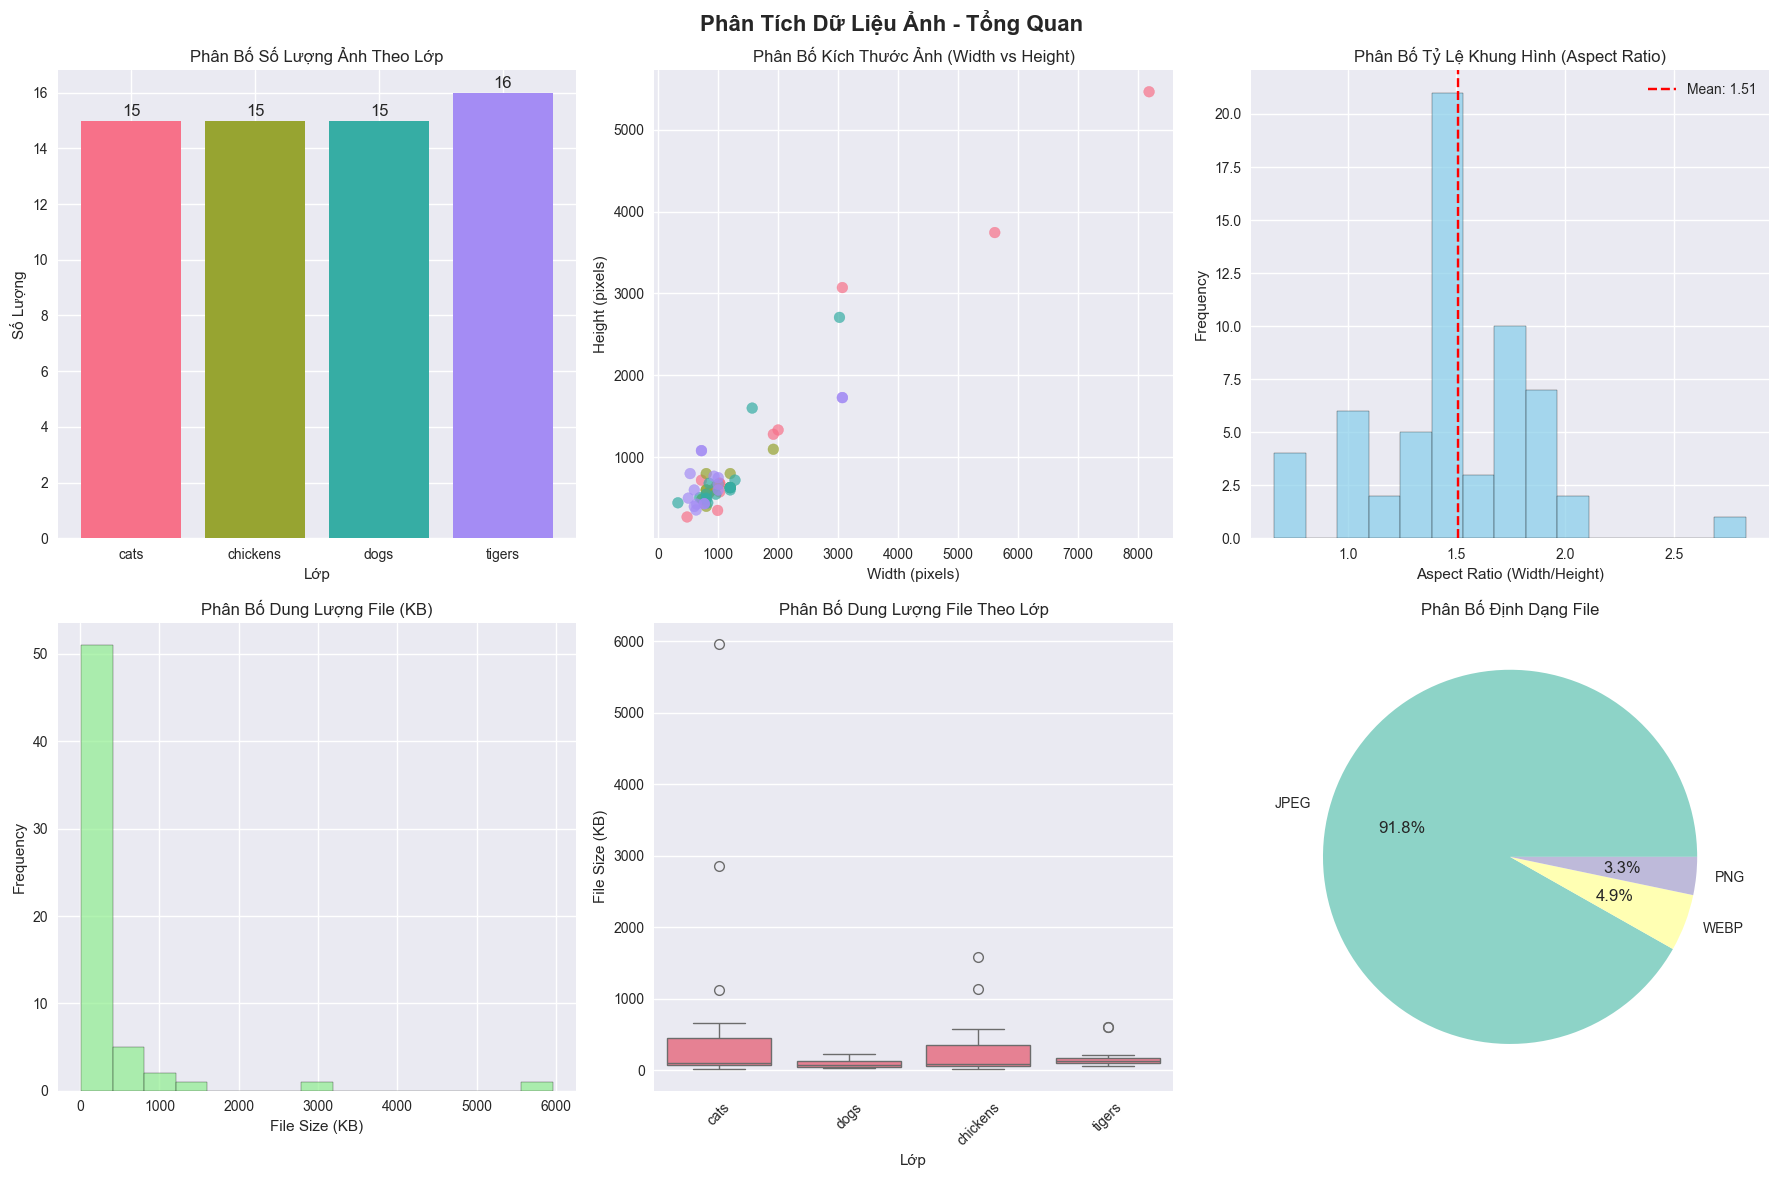

In [20]:
# Tạo figure với nhiều subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Phân Tích Dữ Liệu Ảnh - Tổng Quan', fontsize=16, fontweight='bold')

# 1. Phân bố số lượng ảnh theo lớp
class_counts = df_images['class'].value_counts().sort_index()
axes[0, 0].bar(class_counts.index, class_counts.values, color=sns.color_palette("husl", len(class_counts)))
axes[0, 0].set_title('Phân Bố Số Lượng Ảnh Theo Lớp')
axes[0, 0].set_xlabel('Lớp')
axes[0, 0].set_ylabel('Số Lượng')
for i, v in enumerate(class_counts.values):
    axes[0, 0].text(i, v + 0.05, str(v), ha='center', va='bottom')

# 2. Phân bố kích thước ảnh
axes[0, 1].scatter(df_images['width'], df_images['height'], 
                   c=[sns.color_palette("husl", len(CLASSES))[CLASSES.index(x)] for x in df_images['class']],
                   alpha=0.7, s=60)
axes[0, 1].set_title('Phân Bố Kích Thước Ảnh (Width vs Height)')
axes[0, 1].set_xlabel('Width (pixels)')
axes[0, 1].set_ylabel('Height (pixels)')

# 3. Histogram tỷ lệ khung hình
axes[0, 2].hist(df_images['aspect_ratio'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 2].set_title('Phân Bố Tỷ Lệ Khung Hình (Aspect Ratio)')
axes[0, 2].set_xlabel('Aspect Ratio (Width/Height)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].axvline(df_images['aspect_ratio'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df_images["aspect_ratio"].mean():.2f}')
axes[0, 2].legend()

# 4. Phân bố dung lượng file
axes[1, 0].hist(df_images['file_size_kb'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Phân Bố Dung Lượng File (KB)')
axes[1, 0].set_xlabel('File Size (KB)')
axes[1, 0].set_ylabel('Frequency')

# 5. Boxplot dung lượng theo lớp
sns.boxplot(data=df_images, x='class', y='file_size_kb', ax=axes[1, 1])
axes[1, 1].set_title('Phân Bố Dung Lượng File Theo Lớp')
axes[1, 1].set_xlabel('Lớp')
axes[1, 1].set_ylabel('File Size (KB)')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Định dạng file
format_counts = df_images['format'].value_counts()
axes[1, 2].pie(format_counts.values, labels=format_counts.index, autopct='%1.1f%%', 
               colors=sns.color_palette("Set3", len(format_counts)))
axes[1, 2].set_title('Phân Bố Định Dạng File')

plt.tight_layout()
plt.show()


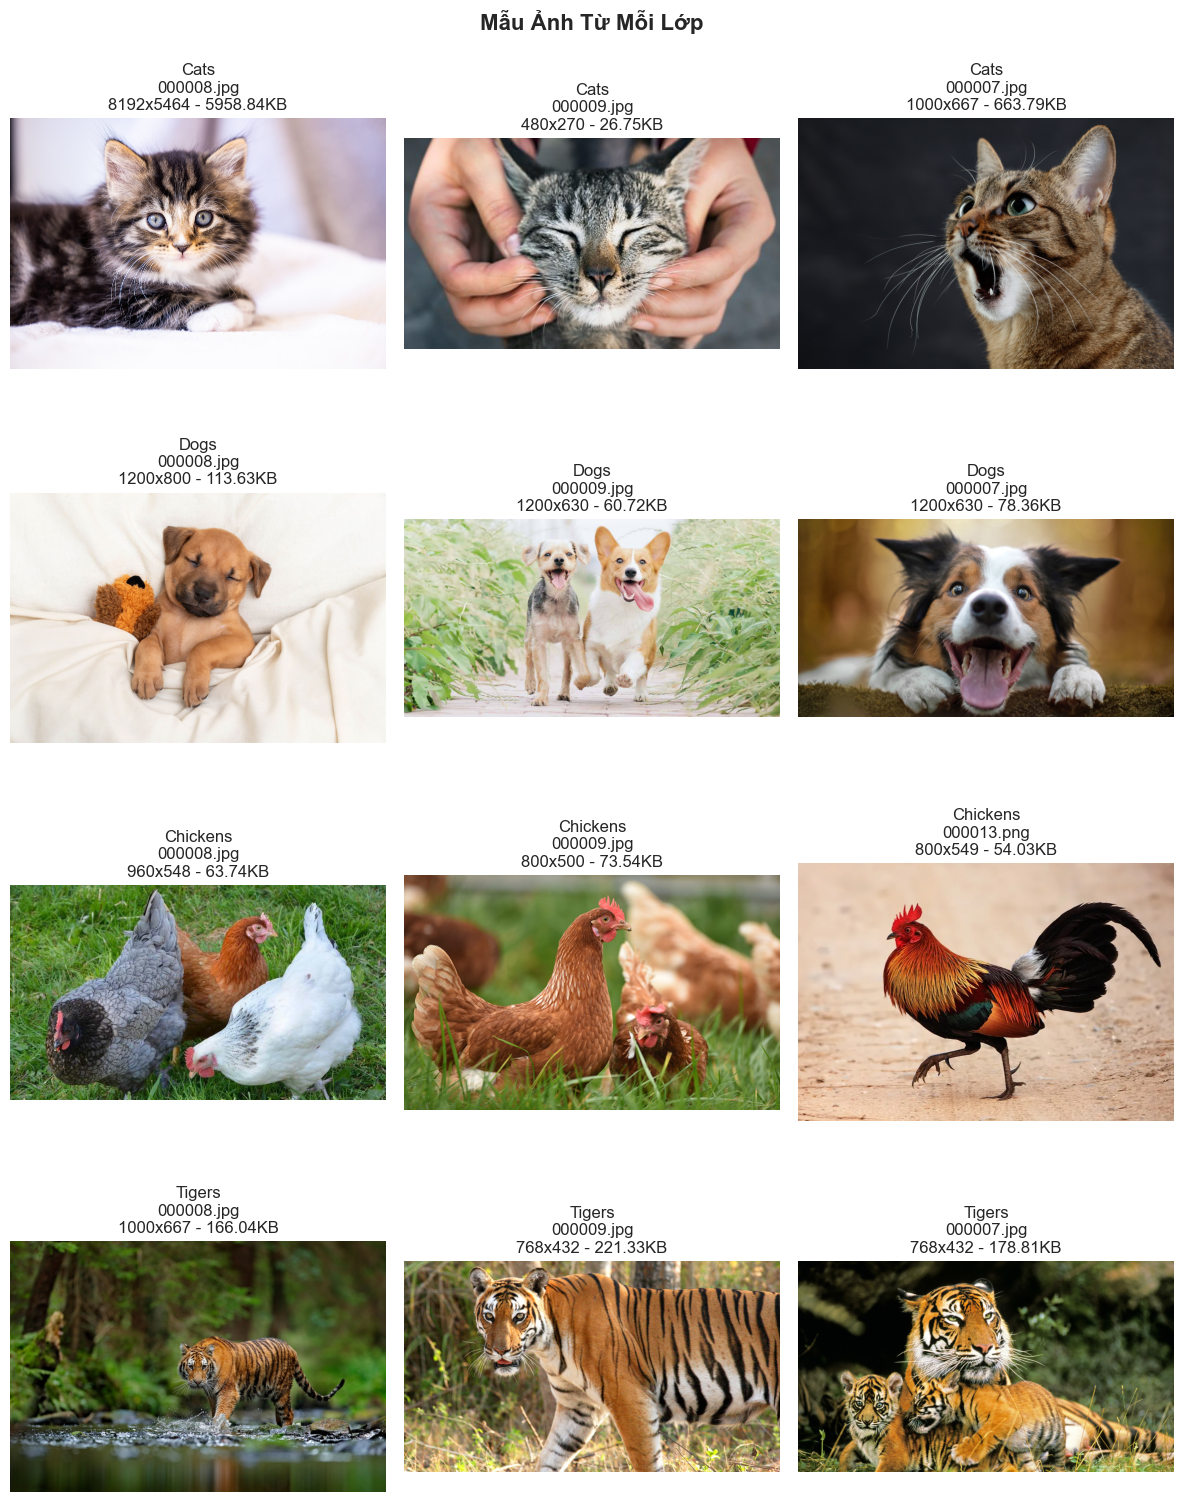

In [21]:
# Hiển thị mẫu ảnh từ mỗi lớp
def display_sample_images(df, classes, n_samples=3):
    """Hiển thị n_samples ảnh từ mỗi lớp"""
    n_classes = len(classes)
    fig, axes = plt.subplots(n_classes, n_samples, figsize=(4*n_samples, 4*n_classes))
    fig.suptitle('Mẫu Ảnh Từ Mỗi Lớp', fontsize=16, fontweight='bold')
    
    for i, class_name in enumerate(classes):
        class_images = df[df['class'] == class_name].head(n_samples)
        
        for j, (_, row) in enumerate(class_images.iterrows()):
            try:
                # Đọc và hiển thị ảnh
                img = Image.open(row['path'])
                
                if n_classes == 1:
                    ax = axes[j]
                else:
                    ax = axes[i, j]
                    
                ax.imshow(img)
                ax.set_title(f"{class_name.capitalize()}\n{row['filename']}\n"
                           f"{row['width']}x{row['height']} - {row['file_size_kb']}KB")
                ax.axis('off')
                
            except Exception as e:
                print(f"❌ Lỗi khi hiển thị {row['path']}: {e}")
    
    plt.tight_layout()
    plt.show()

# Hiển thị mẫu ảnh
display_sample_images(df_images, CLASSES, n_samples=3)


🎨 Đang phân tích màu sắc của các ảnh mẫu...


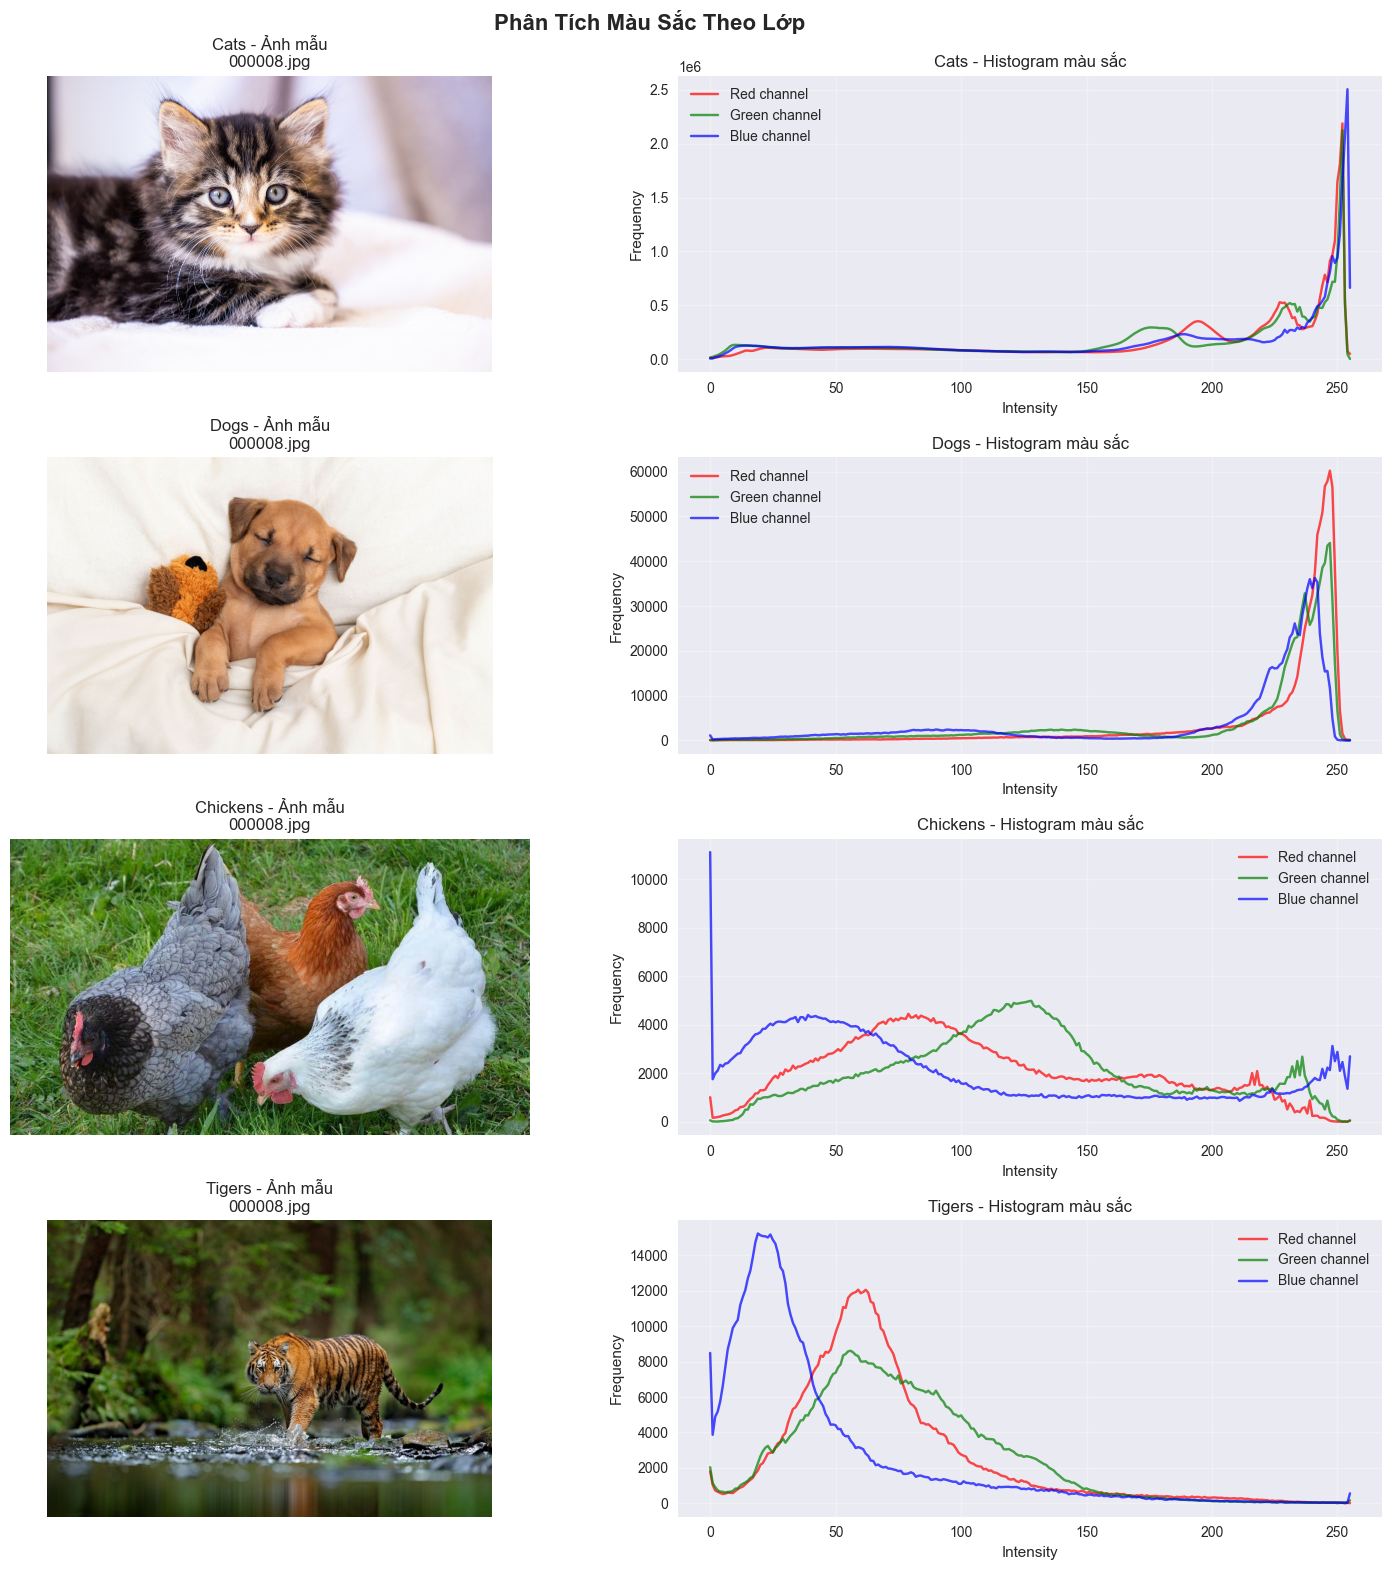

In [22]:
# Phân tích màu sắc của ảnh
def analyze_image_colors(image_path):
    """Phân tích histogram màu sắc của một ảnh"""
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Tính histogram cho mỗi kênh màu
    colors = ['red', 'green', 'blue']
    histograms = []
    
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        histograms.append(hist)
    
    return histograms, img_rgb

def plot_color_analysis(df, classes):
    """Vẽ biểu đồ phân tích màu sắc cho mỗi lớp"""
    fig, axes = plt.subplots(len(classes), 2, figsize=(15, 4*len(classes)))
    fig.suptitle('Phân Tích Màu Sắc Theo Lớp', fontsize=16, fontweight='bold')
    
    colors = ['red', 'green', 'blue']
    
    for i, class_name in enumerate(classes):
        # Lấy ảnh đầu tiên của lớp để làm mẫu
        sample_image = df[df['class'] == class_name].iloc[0]
        
        try:
            result = analyze_image_colors(sample_image['path'])
            if result is None:
                continue
                
            histograms, img_rgb = result
            
            # Hiển thị ảnh mẫu
            axes[i, 0].imshow(img_rgb)
            axes[i, 0].set_title(f'{class_name.capitalize()} - Ảnh mẫu\n{sample_image["filename"]}')
            axes[i, 0].axis('off')
            
            # Vẽ histogram màu sắc
            for j, color in enumerate(colors):
                axes[i, 1].plot(histograms[j], color=color, alpha=0.7, label=f'{color.capitalize()} channel')
            
            axes[i, 1].set_title(f'{class_name.capitalize()} - Histogram màu sắc')
            axes[i, 1].set_xlabel('Intensity')
            axes[i, 1].set_ylabel('Frequency')
            axes[i, 1].legend()
            axes[i, 1].grid(True, alpha=0.3)
            
        except Exception as e:
            print(f"❌ Lỗi khi phân tích màu sắc cho {class_name}: {e}")
    
    plt.tight_layout()
    plt.show()

# Thực hiện phân tích màu sắc
print("🎨 Đang phân tích màu sắc của các ảnh mẫu...")
plot_color_analysis(df_images, CLASSES)


In [23]:
# Phân tích chi tiết theo từng lớp
def create_class_summary(df, classes):
    """Tạo bảng tổng hợp thống kê cho từng lớp"""
    summary_data = []
    
    for class_name in classes:
        class_data = df[df['class'] == class_name]
        
        summary = {
            'Class': class_name.capitalize(),
            'Số lượng': len(class_data),
            'Chiều rộng TB': f"{class_data['width'].mean():.0f}",
            'Chiều cao TB': f"{class_data['height'].mean():.0f}",
            'Kích thước min': f"{class_data['width'].min()}x{class_data['height'].min()}",
            'Kích thước max': f"{class_data['width'].max()}x{class_data['height'].max()}",
            'Tỷ lệ khung hình TB': f"{class_data['aspect_ratio'].mean():.2f}",
            'Dung lượng TB (KB)': f"{class_data['file_size_kb'].mean():.1f}",
            'Dung lượng min (KB)': f"{class_data['file_size_kb'].min():.1f}",
            'Dung lượng max (KB)': f"{class_data['file_size_kb'].max():.1f}",
            'Định dạng': ', '.join(class_data['format'].unique()),
            'Chế độ màu': ', '.join(class_data['color_mode'].unique())
        }
        summary_data.append(summary)
    
    return pd.DataFrame(summary_data)

# Tạo bảng tổng hợp
print("📊 Tạo bảng tổng hợp thống kê theo lớp...")
summary_df = create_class_summary(df_images, CLASSES)
print("\n📋 Bảng Tổng Hợp Thống Kê Theo Lớp:")
print("="*100)
print(summary_df.to_string(index=False))

# Lưu bảng tổng hợp ra file CSV
summary_df.to_csv('../outputs/image_analysis_summary.csv', index=False)
print(f"\n💾 Đã lưu bảng tổng hợp vào file: ../outputs/image_analysis_summary.csv")


📊 Tạo bảng tổng hợp thống kê theo lớp...

📋 Bảng Tổng Hợp Thống Kê Theo Lớp:
   Class  Số lượng Chiều rộng TB Chiều cao TB Kích thước min Kích thước max Tỷ lệ khung hình TB Dung lượng TB (KB) Dung lượng min (KB) Dung lượng max (KB)       Định dạng Chế độ màu
    Cats        15          1982         1374        480x270      8192x5464                1.56              783.9                26.8              5958.8      JPEG, WEBP        RGB
    Dogs        15           994          634        729x400      1920x1097                1.58               99.0                32.4               226.7            JPEG        RGB
Chickens        15          1115          778        327x443      3024x2708                1.55              317.2                14.2              1590.2 JPEG, WEBP, PNG  RGB, RGBA
  Tigers        16          1034          772        500x355      3072x1728                1.35              190.2                62.4               612.2 JPEG, WEBP, PNG     RGB, P

💾 Đã lưu bản

In [24]:
# Xuất dữ liệu phân tích chi tiết
print("📤 Xuất dữ liệu phân tích...")

# Lưu DataFrame chi tiết
df_images.to_csv('../outputs/detailed_image_analysis.csv', index=False)
print(f"✅ Đã lưu phân tích chi tiết vào: ../outputs/detailed_image_analysis.csv")

# Tạo file báo cáo text
report_path = '../outputs/eda_report.txt'
with open(report_path, 'w', encoding='utf-8') as f:
    f.write("BÁOCÁO PHÂN TÍCH KHÁM PHÁ DỮ LIỆU ẢNH\n")
    f.write("="*50 + "\n\n")
    
    f.write("TỔNG QUAN DATASET:\n")
    f.write(f"- Tổng số ảnh: {len(df_images)}\n")
    f.write(f"- Số lớp: {df_images['class'].nunique()}\n")
    f.write(f"- Các lớp: {', '.join(CLASSES)}\n\n")
    
    f.write("THỐNG KÊ KÍCH THƯỚC:\n")
    f.write(f"- Chiều rộng trung bình: {df_images['width'].mean():.0f} pixels\n")
    f.write(f"- Chiều cao trung bình: {df_images['height'].mean():.0f} pixels\n")
    f.write(f"- Tỷ lệ khung hình trung bình: {df_images['aspect_ratio'].mean():.2f}\n\n")
    
    f.write("THỐNG KÊ DUNG LƯỢNG:\n")
    f.write(f"- Dung lượng trung bình: {df_images['file_size_kb'].mean():.1f} KB\n")
    f.write(f"- Dung lượng nhỏ nhất: {df_images['file_size_kb'].min():.1f} KB\n")
    f.write(f"- Dung lượng lớn nhất: {df_images['file_size_kb'].max():.1f} KB\n\n")
    
    f.write("ĐỊNH DẠNG FILE:\n")
    for format_name, count in df_images['format'].value_counts().items():
        f.write(f"- {format_name}: {count} files\n")

print(f"✅ Đã tạo báo cáo tóm tắt: {report_path}")

print(f"\n🎉 Hoàn thành phân tích EDA! Các file output:")
print(f"  📊 {len(df_images)} ảnh đã được phân tích")
print(f"  📁 Chi tiết: ../outputs/detailed_image_analysis.csv")
print(f"  📋 Tóm tắt: ../outputs/image_analysis_summary.csv")
print(f"  📝 Báo cáo: ../outputs/eda_report.txt")


📤 Xuất dữ liệu phân tích...
✅ Đã lưu phân tích chi tiết vào: ../outputs/detailed_image_analysis.csv
✅ Đã tạo báo cáo tóm tắt: ../outputs/eda_report.txt

🎉 Hoàn thành phân tích EDA! Các file output:
  📊 61 ảnh đã được phân tích
  📁 Chi tiết: ../outputs/detailed_image_analysis.csv
  📋 Tóm tắt: ../outputs/image_analysis_summary.csv
  📝 Báo cáo: ../outputs/eda_report.txt
